In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 7s - 23ms/step - accuracy: 0.0963 - loss: 2.3169
0.09629999846220016


In [9]:
import numpy as np

predictions = model.predict(test_images)
predicted_digit = np.argmax(predictions[1])
print("Predicted Digit:", predicted_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted Digit: 8


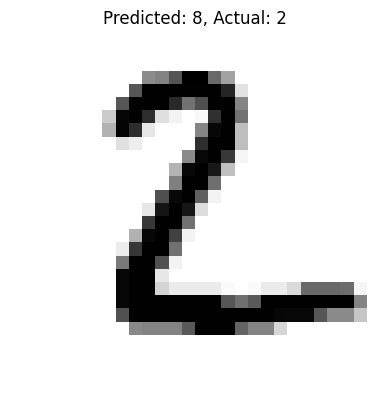

In [10]:
import matplotlib.pyplot as plt

index = 1
predicted_digit = np.argmax(predictions[index])

plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_digit}, Actual: {test_labels[index]}")
plt.axis('off')
plt.show()